# DataViz Project - Airplane Crashes Since 1908

## 2. Exploratory Data Analysis

### 2.1. The clean dataset

From the previous step, we can now use a clean version of the original dataset.

In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


file_path = "dataset/dataset_final.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 11 columns):
Date          5265 non-null object
Time          3069 non-null object
Location      5265 non-null object
Latitude      5265 non-null float64
Longitude     5265 non-null float64
Operator      5247 non-null object
Type          5240 non-null object
Aboard        5265 non-null int64
Fatalities    5265 non-null int64
Ground        5265 non-null int64
Summary       5265 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 452.5+ KB


In [2]:
df.shape

(5265, 11)

In [3]:
#Correlation matrix
df.corr()

,Latitude,Longitude,Aboard,Fatalities,Ground
Latitude,1.000000,-0.214655,-0.002254,-0.007428,0.008884
Longitude,-0.214655,1.000000,0.154876,0.167450,-0.011609
Aboard,-0.002254,0.154876,1.000000,0.756825,0.023278
Fatalities,-0.007428,0.167450,0.756825,1.000000,0.035200
Ground,0.008884,-0.011609,0.023278,0.035200,1.000000


In [4]:
df.describe()

,Latitude,Longitude,Aboard,Fatalities,Ground
count,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000
mean,27.025934,-15.977481,27.515670,20.037987,1.604368
std,24.566985,83.299393,43.009579,33.179443,53.890405
min,-77.529716,-176.669861,1.000000,0.000000,0.000000
25%,10.982680,-82.657707,5.000000,3.000000,0.000000
50%,34.405231,-8.882220,13.000000,9.000000,0.000000
75%,43.816021,37.615021,30.000000,23.000000,0.000000
max,80.449997,178.800476,644.000000,583.000000,2750.000000


In [5]:
df.median()

Latitude      34.405231
Longitude     -8.882220
Aboard        13.000000
Fatalities     9.000000
Ground         0.000000
dtype: float64

In [6]:
print(df["Date"].mode(), "\n",
      df["Time"].mode(), "\n",
      df["Ground"].mode(), "\n",
     df["Operator"].mode(), "\n",
     df["Type"].mode())

0    1972-06-18
1    1973-02-28
2    1976-08-28
3    1988-08-31
4    1992-08-27
5    2001-09-11
dtype: object 
 0    12:00
dtype: object 
 0    0
dtype: int64 
 0    Aeroflot
dtype: object 
 0    Douglas DC-3
dtype: object


In [7]:
df.Time.value_counts()

12:00    38
15:00    33
11:00    29
19:30    26
16:00    26
14:00    25
19:00    24
09:30    23
17:00    22
10:30    22
13:00    20
20:30    20
14:30    19
08:30    19
09:00    19
17:30    19
08:00    19
12:30    18
18:00    18
10:15    17
20:00    17
16:30    17
23:00    16
11:30    15
10:00    15
07:00    15
15:30    15
01:00    15
02:00    15
13:30    15
         ..
10:56     1
05:45     1
02:36     1
06:32     1
04:22     1
08:41     1
08:31     1
06:18     1
19:53     1
03:44     1
03:14     1
05:46     1
12:02     1
08:23     1
09:54     1
04:50     1
21:07     1
18:42     1
19:34     1
19:55     1
03:54     1
21:51     1
10:46     1
04:47     1
12:32     1
00:23     1
20:58     1
01:37     1
08:56     1
17:02     1
Name: Time, Length: 998, dtype: int64

In [8]:
#same for operators


In [35]:
#quickly setup graphics 
print(plt.style.available)
mp.style.use("bmh")
mp.rcParams['figure.figsize'] = (10, 6)

#colors
# to change default colormap
plt.rcParams["image.cmap"] = "magma"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.magma.colors[90:-16])
# a few defaults
my_purple = plt.cm.magma.colors[90:91][0]
my_red = plt.cm.magma.colors[160:161][0]
my_pink = plt.cm.magma.colors[150:151][0]
my_orange = plt.cm.magma.colors[200:201][0]
my_orangea=[0.992785, 0.594891, 0.410283, 0.9]
my_yellow = plt.cm.magma.colors[250:251][0]

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


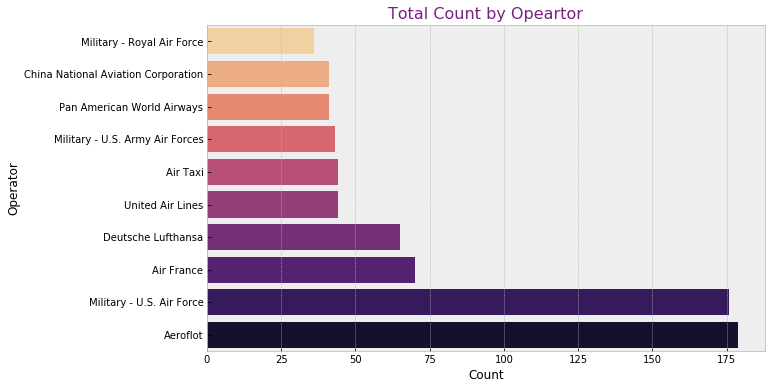

In [43]:
operator_counts = df.groupby('Operator')[['Operator']].count()
operator_counts = operator_counts.rename(columns={"Operator": "Count"})
#get 10 most frequent
operator_counts = operator_counts.sort_values(by='Count').tail(10)

sns.barplot(y=operator_counts.index, x="Count", data=operator_counts, palette="magma_r", orient='h')

plt.title('Total Count by Opeartor', loc='Center', fontsize=16, color=my_purple[0])

plt.show()



if we filter sort_values by descending values, and only the top x, we can get the plot looking better, i.e, most frequent operator up top

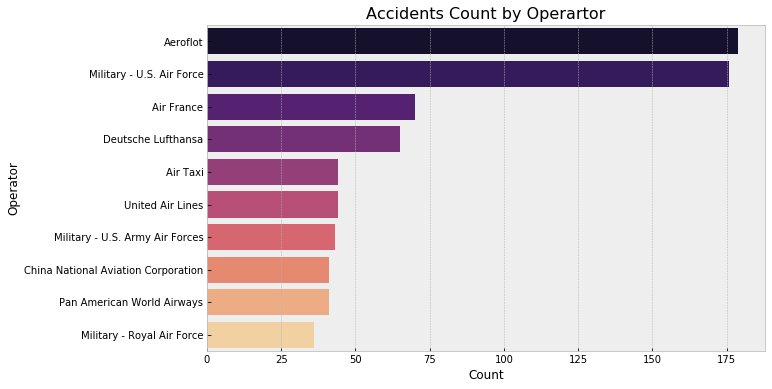

In [44]:
operator_counts = operator_counts.sort_values(by='Count', ascending = False).head(10)

sns.barplot(y=operator_counts.index, x="Count", data=operator_counts, palette="magma", orient='h')

plt.title('Accidents Count by Operartor', loc='Center', fontsize=16)

plt.show()

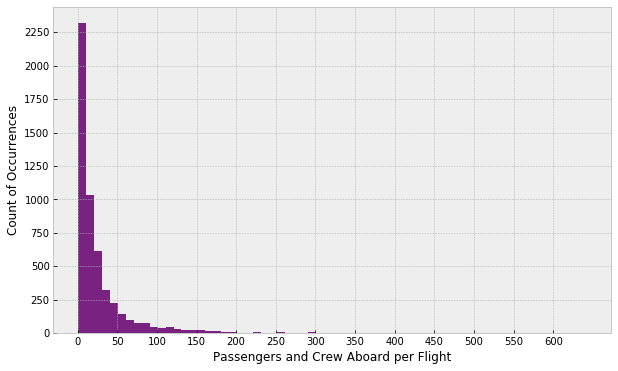

In [82]:
df["Aboard"].hist(bins = range(df["Aboard"].min(), df["Aboard"].max(), 10), color=my_purple)
plt.ylabel("Count of Occurrences")
plt.xlabel("Passengers and Crew Aboard per Flight")
plt.yticks(range(0, 2500, 250))
plt.xticks(range(0, 650, 50))
plt.show()



A big portion of the crashes happened with planes carrying 10 people or less.

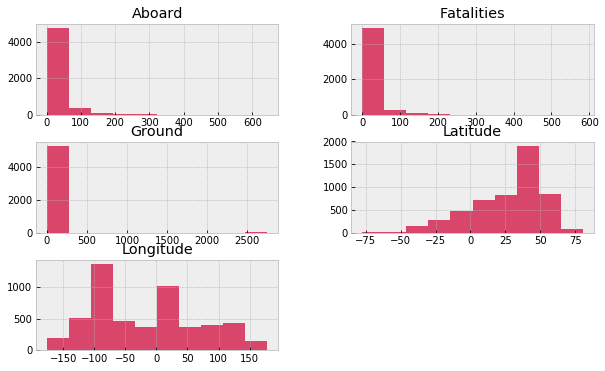

In [83]:
df.hist(color=plt.cm.magma.colors[150:151])
plt.show()

In [13]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")
df["Date"].head() 

0   1908-09-17
1   1912-07-12
2   1913-08-06
3   1913-09-09
4   1913-10-17
Name: Date, dtype: datetime64[ns]

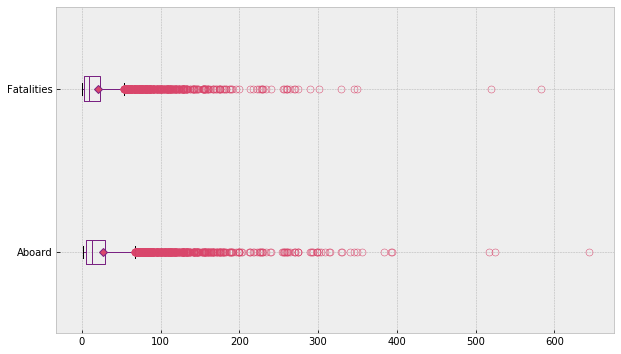

In [171]:
no_time_df = df.drop("Date", axis=1)
mcolor = [0.852126, 0.276106, 0.418573, 0.99]
# define style of fliers in variable
my_marker = dict(markeredgecolor=mcolor, marker='o', markersize=7, markeredgewidth=0.5, fillstyle="none")
no_time_df.boxplot(column=["Aboard", "Fatalities"], 
                   vert=False, showmeans=True, 
                   flierprops=my_marker, 
                   meanprops=dict(marker="D", markerfacecolor=mcolor))
plt.show()

In [173]:
df.Fatalities.quantile(0.5)

9.0

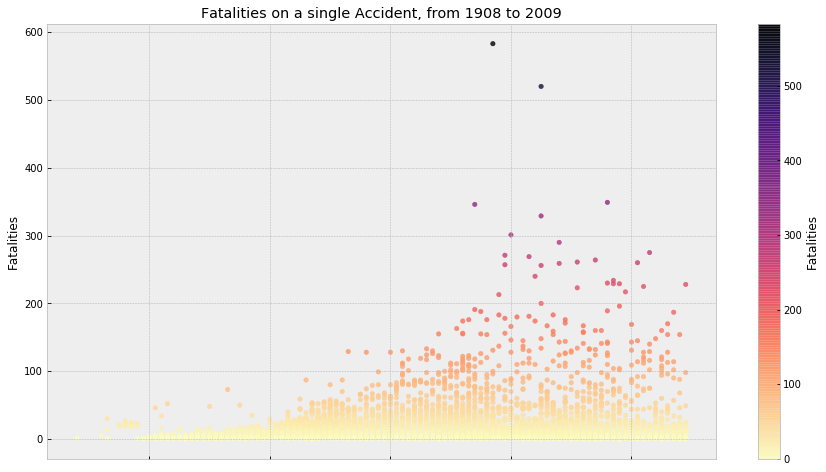

In [16]:
year = df.Date.dt.year
fatalities = df.Fatalities
d={"Year": year, "Fatalities": fatalities}

fatalities_year = pd.DataFrame(data=d)
fatalities_year
fatalities_year.plot.scatter(x="Year",y="Fatalities", 
                             c='Fatalities', cmap='magma_r', alpha=0.8,
                             figsize=(15,8)
                            )
plt.xlabel("Years")
plt.title("Fatalities on a single Accident, from 1908 to 2009")
plt.show()

#TODO: aggregate fatalities and ground for a more figure of deaths by accident
#TODO: ratios

In [132]:
aboard = df.Aboard
dratio={"Year": year, "Aboard": aboard, "Fatalities": fatalities, "Ground": df.Ground, "Ratio": fatalities/aboard, "TotalFatalities":fatalities+df.Ground}


fatalities_year_r = pd.DataFrame(data=dratio)
#column_series[(column_series < value)]
fatalities_year_r = fatalities_year_r[(fatalities_year_r.Ratio <= 1)]
#to check
fatalities_year_r["Ratio"].max()

1.0

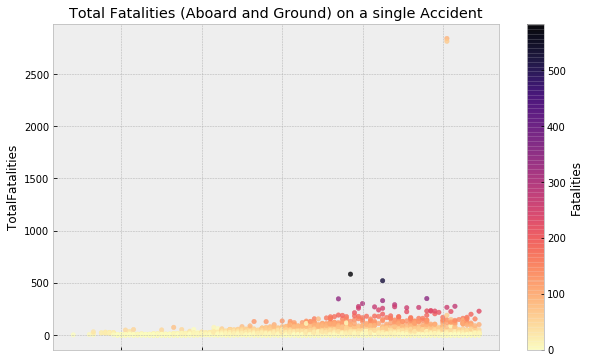

In [151]:
#scatterplot
fatalities_year_r = fatalities_year_r.dropna()
fatalities_year_r["Fatalities"] = fatalities_year_r["Fatalities"].astype(dtype='int64')

fatalities_year_r.plot.scatter(x="Year",y="TotalFatalities", 
                                 c='Fatalities', cmap='magma_r', alpha=0.8,
                            )
plt.xlabel("Years")
plt.title("Total Fatalities (Aboard and Ground) on a single Accident")
plt.show()

#TODO: aggregate fatalities and ground for a more figure of deaths by accident
#TODO: ratios

The ten most deadly years

       Count  Fatalities
Date                   
1972    104        2937
1985     74        2670
1973     89        2485
1996     81        2386
1974     82        2318
1989     95        2293
1968     96        2156
1977     81        2138
1992     86        2122
1976     86        2059


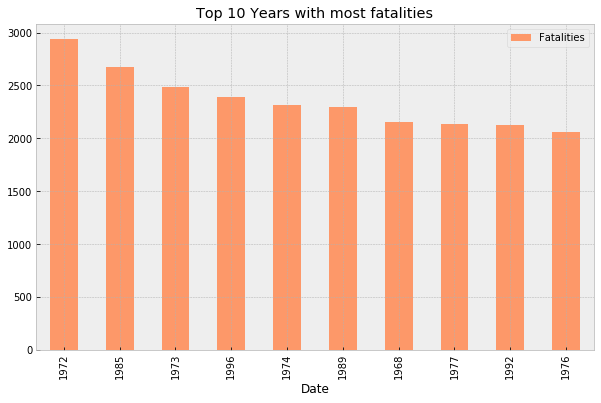

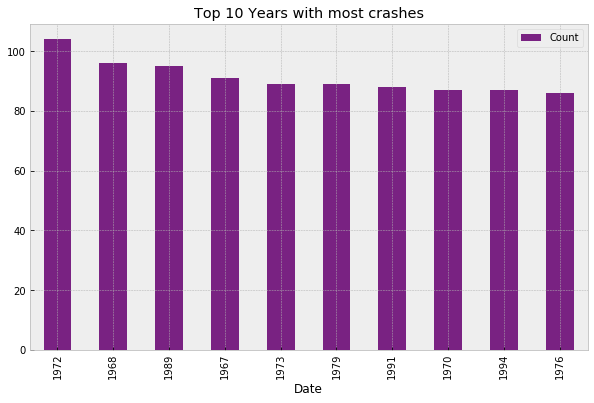

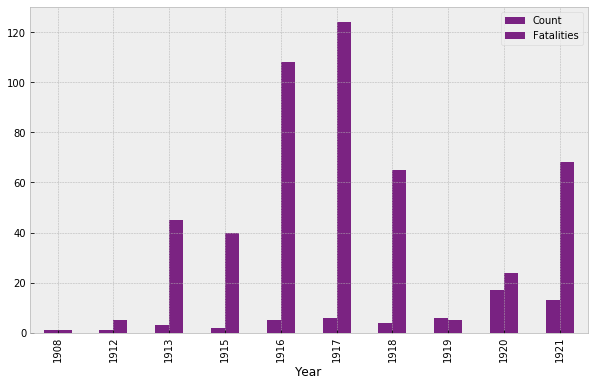

In [163]:
#Number of accidents recorded by year
crashes_year = df.groupby(df.Date.dt.year)[["Date"]].count()
crashes_year = crashes_year.rename(columns={"Date": "Count"})
fatalities_year = df.groupby(df.Date.dt.year)[["Fatalities"]].sum()
fatalities_year = fatalities_year.rename(columns={"Date": "Total"})

dfy = crashes_year.join(fatalities_year)

print("The ten most deadly years\n\n", dfy.nlargest(10, "Fatalities"))


fatalities_year.nlargest(10, "Fatalities").plot.bar(color=my_orange)
plt.title("Top 10 Years with most fatalities")
crashes_year.nlargest(10, "Count").plot.bar(color=my_purple)
plt.title("Top 10 Years with most crashes")

dfy.head(10).plot.bar()

plt.xlabel("Year")
plt.show()

Text(0.5, 1.0, 'Top 10 Years with most fatalities')

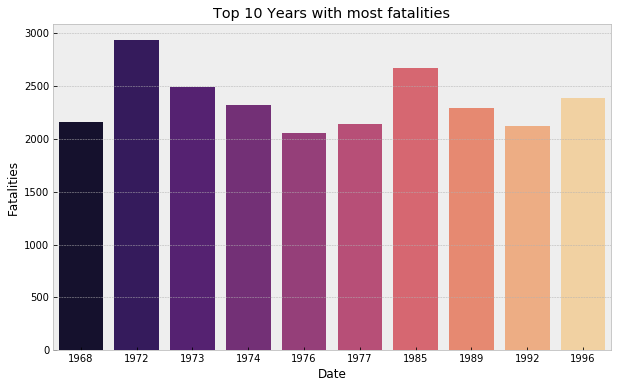

In [159]:
fatalities_order = fatalities_year.nlargest(10, "Fatalities")
sns.barplot(x=fatalities_order.index.get_level_values(0), y=fatalities_order.Fatalities, data=fatalities_order, palette="magma", orient='v')
plt.title("Top 10 Years with most fatalities")

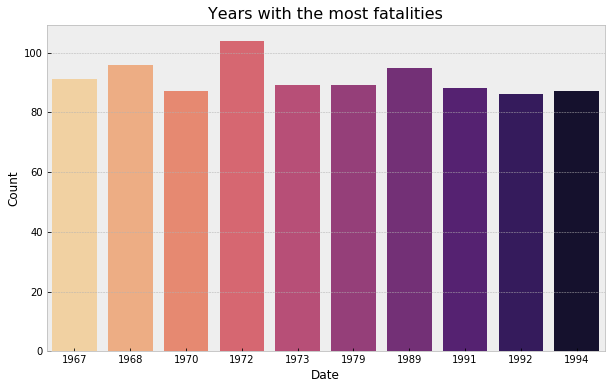

In [68]:
dfy_order = dfy.sort_values(by='Count', ascending = False).head(10)

sns.barplot(x=dfy_order.index.get_level_values(0), y="Count", data=dfy_order, palette="magma_r", orient='v')

plt.title('Years with the most fatalities', loc='Center', fontsize=16)

plt.show()

In [18]:
#year with most crashes
dfy[(dfy["Count"] == dfy.Count.max())]

,Count,Fatalities
Date,,
1972,104,2937


In [19]:
#year with most fatalities
dfy[(dfy["Fatalities"] == dfy.Fatalities.max())]

,Count,Fatalities
Date,,
1972,104,2937


The year with the most crashes was also the year with most fatalities recorded: 1972.

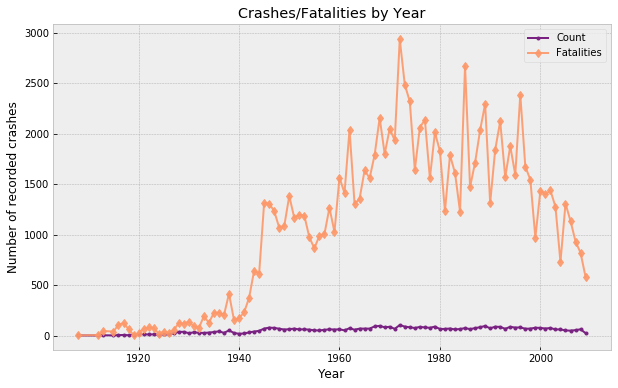

In [169]:
plt.plot(crashes_year.index, 'Count', data=crashes_year, marker = ".")
plt.plot(fatalities_year.index, 'Fatalities', data=fatalities_year, marker = "d", color=my_orangea)
plt.xlabel('Year')
plt.ylabel('Number of recorded crashes')
plt.title('Crashes/Fatalities by Year', loc='Center')
plt.legend()
plt.show()

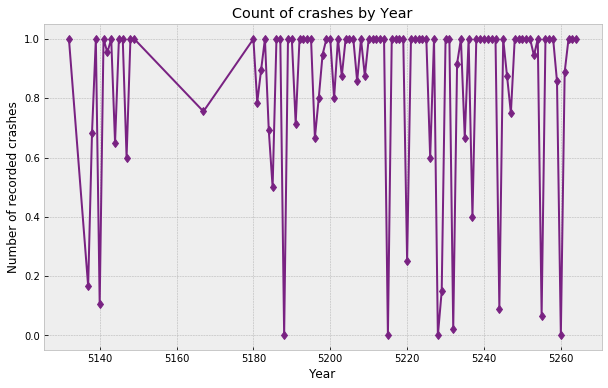

In [147]:
#fatalities_year_r

fyr = fatalities_year_r.sort_values(by="Year")

fyr_t = fyr.tail(100)
plt.plot(fyr_t.index.sort_values(), 'Ratio', data=fyr_t, marker = "d")
plt.xlabel('Year')
plt.ylabel('Number of recorded crashes')
plt.title('Count of crashes by Year', loc='Center')
plt.show()

/Users/catarina/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


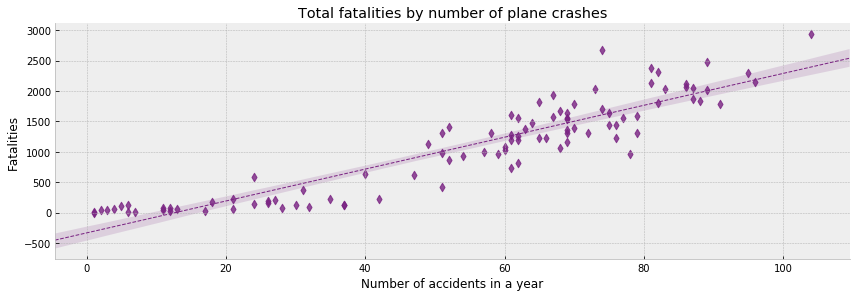

In [21]:
#try out regression using seaborn
sns.lmplot("Count", "Fatalities", dfy, 
           size=4, aspect=3, markers="d",
           line_kws={"linewidth":1, "linestyle": '--'}
           )
plt.title("Total fatalities by number of plane crashes")
plt.xlabel("Number of accidents in a year")
plt.savefig("lm_fatalyear.svg")

Pretty much as expected, the more plain crashes in a given year, the more fatalities.

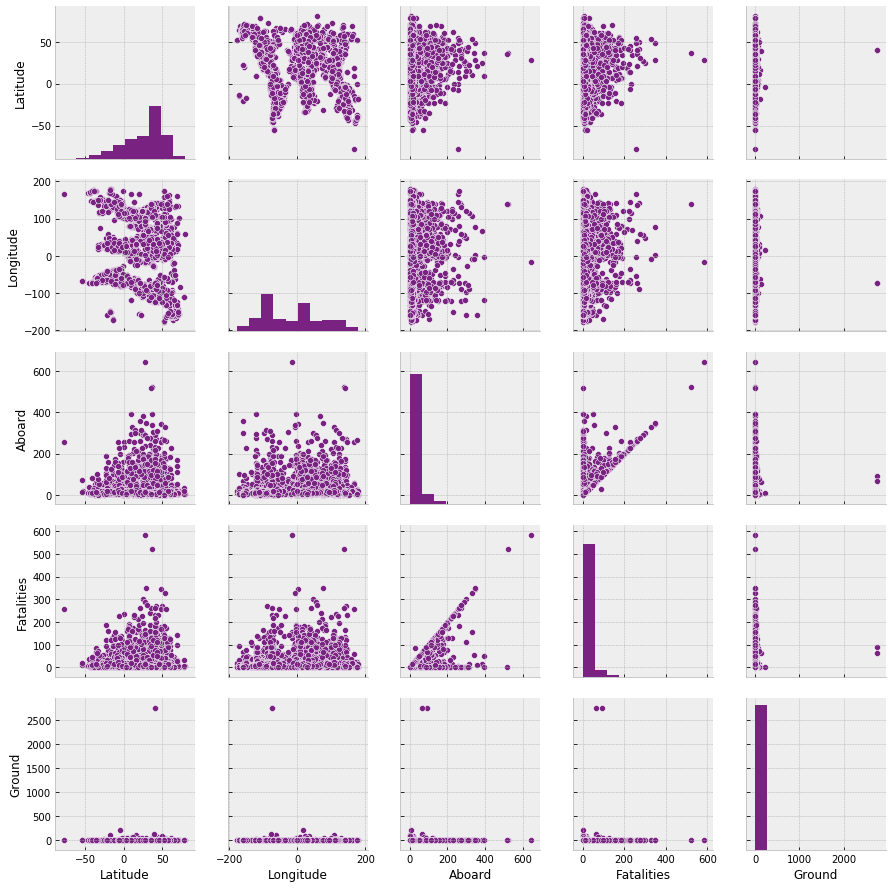

In [22]:
sns.pairplot(df)
plt.savefig("mpl_scatter_fatalyear.svg")

In [23]:
#Saving our plot as an image...
plt.savefig("Plots/fatalities_year_scatter.png")

<Figure size 432x288 with 0 Axes>

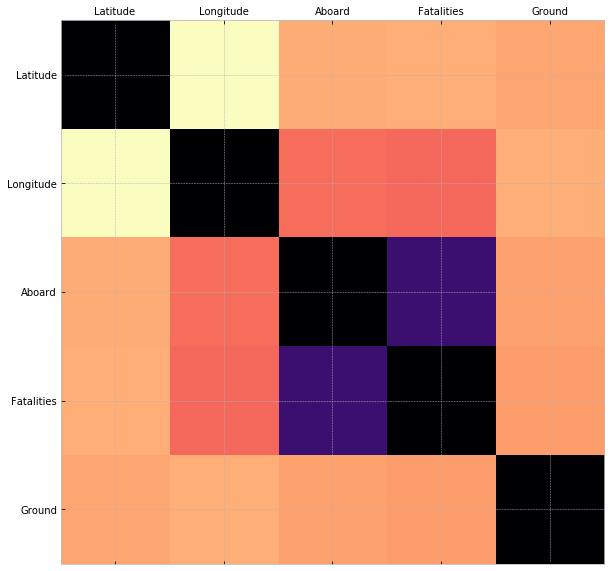

In [24]:
plt.rcParams["image.cmap"] = "magma_r"
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

There seems to be an (unexpected!) correlation between number of fatalities and Longitude of the crash.

In [25]:
df.corr()

,Latitude,Longitude,Aboard,Fatalities,Ground
Latitude,1.000000,-0.214655,-0.002254,-0.007428,0.008884
Longitude,-0.214655,1.000000,0.154876,0.167450,-0.011609
Aboard,-0.002254,0.154876,1.000000,0.756825,0.023278
Fatalities,-0.007428,0.167450,0.756825,1.000000,0.035200
Ground,0.008884,-0.011609,0.023278,0.035200,1.000000
